In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
np.random.seed(1)
np.random.RandomState(1)

RandomState(MT19937) at 0x220D1BEA640

In [5]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,RobustScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix , classification_report , f1_score ,accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.feature_selection import VarianceThreshold , SelectFromModel , SelectKBest ,chi2 ,f_classif
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures


In [6]:
data = pd.read_csv('Train.csv')
data2 = pd.read_csv('SampleSubmission.csv')
data3 = pd.read_csv('Test.csv')
df =data.copy()
df_test = data3.copy()
df.shape

(17761, 15)

Verifier si le test set et le submission set ont le meme nombre de ID Customer :

In [7]:
data2.shape

(767, 2)

In [8]:
data3['Customer ID'].unique().shape

(767,)

In [9]:
df.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480,14400,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800,27000,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450,2250,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
3,8236624,COMPLETED,Paves,Pave chocolat,3,100,300,1460,700700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1
4,8236624,COMPLETED,Tartes,Tarte citron,3,100,300,1460,700700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1


In [10]:
df.dtypes

Order ID              int64
Order Status         object
Category Name        object
Product Name         object
Quantity              int64
Unit Price           object
Total Price          object
Sub Total            object
Delivery Charge      object
Payment Method       object
Customer ID         float64
Merchant              int64
Order Time           object
Customer Country     object
Purchase Again        int64
dtype: object

In [11]:
df['Customer ID'] = df['Customer ID'].astype('object')
df['Merchant'] = df['Merchant'].astype('object')
df['Order ID'] = df['Order ID'].astype('object')
df['Order Time'] = pd.to_datetime(df['Order Time'])

In [12]:
df.dtypes

Order ID                    object
Order Status                object
Category Name               object
Product Name                object
Quantity                     int64
Unit Price                  object
Total Price                 object
Sub Total                   object
Delivery Charge             object
Payment Method              object
Customer ID                 object
Merchant                    object
Order Time          datetime64[ns]
Customer Country            object
Purchase Again               int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          17761 non-null  object        
 1   Order Status      17761 non-null  object        
 2   Category Name     9093 non-null   object        
 3   Product Name      17761 non-null  object        
 4   Quantity          17761 non-null  int64         
 5   Unit Price        17761 non-null  object        
 6   Total Price       17761 non-null  object        
 7   Sub Total         17245 non-null  object        
 8   Delivery Charge   17731 non-null  object        
 9   Payment Method    17326 non-null  object        
 10  Customer ID       17263 non-null  object        
 11  Merchant          17761 non-null  object        
 12  Order Time        17761 non-null  datetime64[ns]
 13  Customer Country  17714 non-null  object        
 14  Purchase Again    1776

In [14]:
df.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Product Name', 'Quantity',
       'Unit Price', 'Total Price', 'Sub Total', 'Delivery Charge',
       'Payment Method', 'Customer ID', 'Merchant', 'Order Time',
       'Customer Country', 'Purchase Again'],
      dtype='object')

Verifier le nombre de clients dans le train set :

In [15]:
df['Customer ID'].unique().shape

(1000,)

Afficher les valeurs uniques de chaque colonne ainsi aue le nombre total de ces valeurs uniques :

In [16]:
for col in list(df.columns) :
    print(col , '-->' ,df[col].unique() ,'\n')
    print(col , '-->' ,df[col].unique().shape ,'\n\n\n')

Order ID --> [8236617 8236624 8236744 ... 3910178905 9296068442 8969960431] 

Order ID --> (2212,) 



Order Status --> ['DEFAULT' 'COMPLETED' 'REJECTED' 'ACCEPTED' 'CANCELLED' 'SEND_TO_TMS'] 

Order Status --> (6,) 



Category Name --> ['Promotions' 'Paves' 'Tartes' 'Eclaires' 'Mille-Feuille' 'Biscuits'
 'Petit-dejeuner' 'Jouets' 'Covid-19' nan 'Lait' 'Bebe' 'Chocolat'
 'Sucrerie' 'Pates et riz' 'Conserves' 'Farine et semoule' 'Patisserie'
 'HygiÃ¨ne & beaute' 'Nettoyage' 'Recharge telephonique' 'Pain Special'
 'Vienoisserie' 'Legumes' 'Herbes' 'Fruits' 'The et cafe' 'Sucre et sel'
 'Huile' 'Cotex' 'Sauces et epices' 'HygiÃ¨ne feminine' 'Ifri' 'Ooredoo'
 'Coca-Cola' 'Condiment' 'Prod. Laitiers' 'Conserve' 'Petit dejeuner'
 'HygiÃ¨ne' 'CrÃ¨merie et oeufs' 'The' 'Fromage' 'Oeufs' 'Garnitures'
 'Snacks' 'Fruits secs' 'Bouquets' 'Cartouche' 'Scolarite' 'Sac a dos'
 'Nourriture' 'Hygiene Feminine' 'Adultes' 'Luminaire' 'Salle de bain'
 'Gateaux secs' 'Salles' 'Mousses' 'Energy Drinks' 'Pr

Purchase Again --> [1 0] 

Purchase Again --> (2,) 





In [17]:
#df['Product Name'].unique()

In [18]:
#df['Product Name'].value_counts()

In [19]:
#df[df['Product Name'] == '2 Fardeaux Ifri']['Purchase Again'].value_counts()

In [20]:
#df['Category Name'].value_counts()

In [21]:
df['Customer Country'].value_counts()

Algeria           17404
France              252
Canada               20
United States        18
United Kingdom       17
Sweden                3
Name: Customer Country, dtype: int64

Visualiser les valeurs manquantes du train set :

<AxesSubplot:>

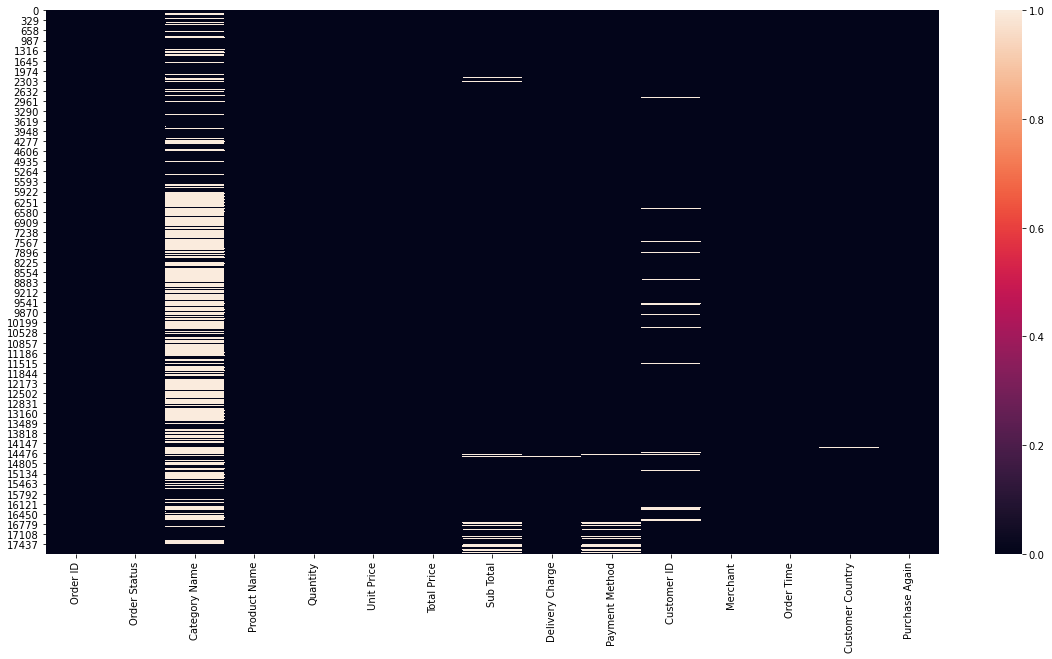

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna() , cbar =True )

Visualiser les valeurs manquantes du test set :

<AxesSubplot:>

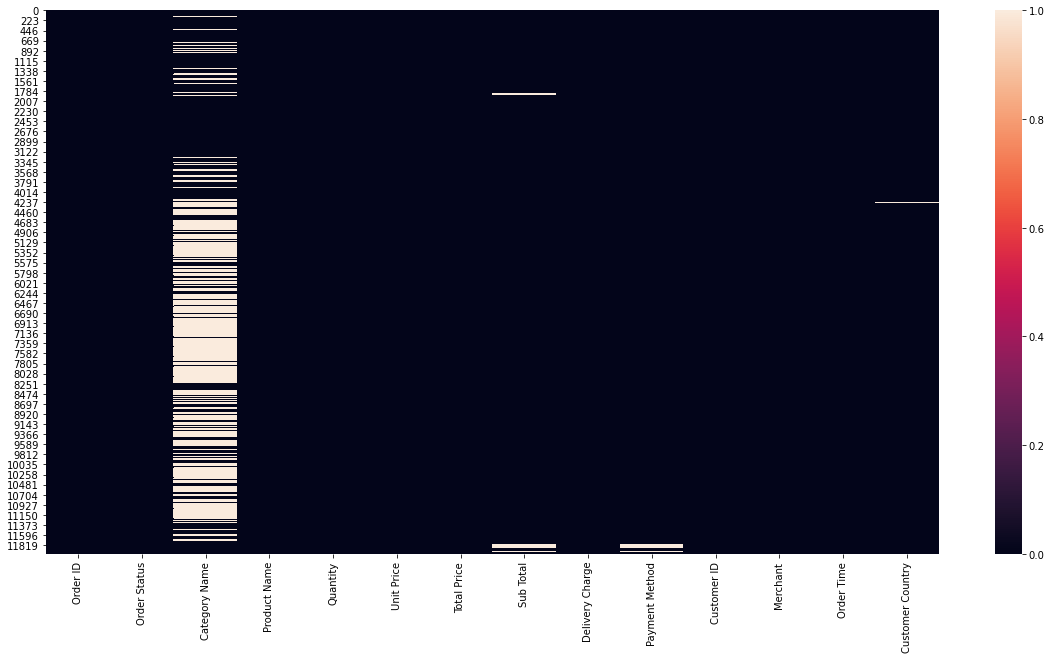

In [23]:
# nan pour le test set 
plt.figure(figsize=(20,10))
sns.heatmap(data3.isna() , cbar =True )

Remplacer les valeurs incohérentes de la colonne ' Unit Price ' par la valeur 1 :

In [24]:
patternDel = r"\d\d \w+ \d+"
df['Unit Price'] = df['Unit Price'].replace(patternDel,1,regex=True)  
df['Unit Price'] = df['Unit Price'].replace(['44,317.00'] , 1)

Modifier le type des variables 'Unit Price' , 'Total Price' , 'Sub Total' en float , et remplacer toutes les valeurs incoherentes ainsi que les valeurs manquantes de 'Sub Total' : 

In [25]:
df['Unit Price'] = df['Unit Price'].astype('float32')

In [26]:
df['Total Price'] = df['Unit Price'] * df['Quantity']

In [27]:
order_id_unique=df['Order ID'].unique()

In [28]:
# imputation de 'Sub Total' : 
for order_id_value in order_id_unique :
    df_result = df.loc[df['Order ID'] == order_id_value]
    subtotal = df_result['Total Price'].sum()
    df.loc[df['Order ID'] == order_id_value , 'Sub Total'] = subtotal

In [29]:
df['Sub Total'] = df['Sub Total'].astype('float32')

In [30]:
df.dtypes

Order ID                    object
Order Status                object
Category Name               object
Product Name                object
Quantity                     int64
Unit Price                 float32
Total Price                float32
Sub Total                  float32
Delivery Charge             object
Payment Method              object
Customer ID                 object
Merchant                    object
Order Time          datetime64[ns]
Customer Country            object
Purchase Again               int64
dtype: object

Visualiser les valeurs manquantes :

<AxesSubplot:>

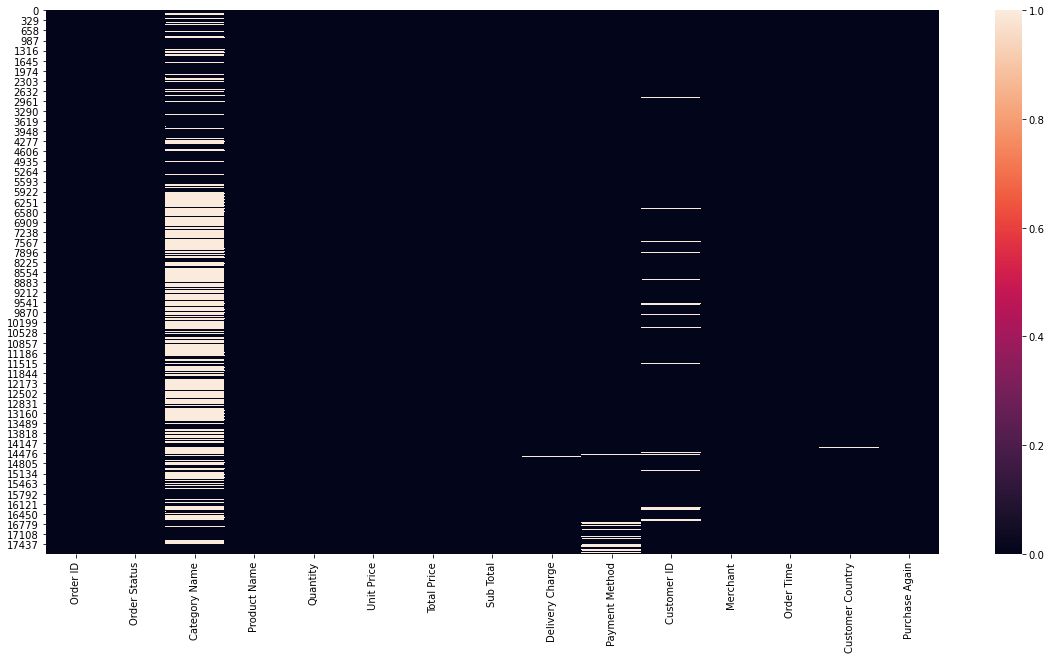

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna() , cbar =True )

Creer un nouveau dataset en supprimant les Costumer ID manquants :

In [32]:
df_notna_custID = df[df['Customer ID'].notna()]

In [33]:
df_notna_custID.shape

(17263, 15)

Re-visualiser pour confirmer qu'il y'a plus de valeurs manquantes dans la colonne Costumer ID

<AxesSubplot:>

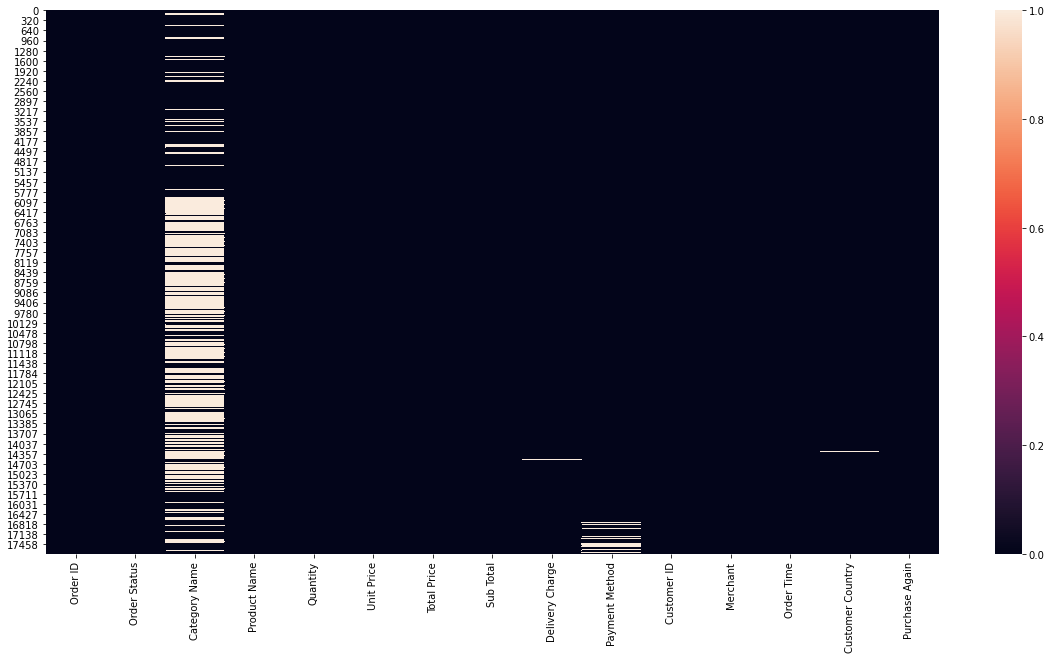

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df_notna_custID.isna() , cbar =True )

Afficher le nombre , ratio des valeurs manquantes et les repetitions des valeurs pour la colonne ' Category Name ' afin de decider quelle est la meilleure maniere de les corriger :

In [35]:
print((df_notna_custID['Category Name'].isna().sum(axis = 0))/17263)
print((df_notna_custID['Category Name'].notna().sum(axis = 0))/17263)
print(df_notna_custID['Category Name'].isna().sum(axis = 0))
print(df_notna_custID['Category Name'].notna().sum(axis = 0))

0.4792909691247176
0.5207090308752824
8274
8989


In [36]:
df_notna_custID['Category Name'].value_counts()

Pates et riz                 719
Legumes                      563
Conserves                    551
Nettoyage                    507
Promotions                   478
                            ... 
Beaux arts                     1
Riz et pates                   1
Piment                         1
Grille pain                    1
Vetements de sport Garcon      1
Name: Category Name, Length: 164, dtype: int64

Vu qu'il y'a pas de category dominante , j'ai decider de remplacer les valeurs nan par 'OTHER' 

In [37]:
df_notna_custID['Category Name'] = df_notna_custID['Category Name'].fillna('OTHER')

Passons a la colonne ' Costumer Country ' :


In [38]:
df_country_isna =df_notna_custID[df_notna_custID['Customer Country'].isna() == True]
df_country_isna 

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
10566,94197676230,CANCELLED,OTHER,Maxwell House Pack: 2 Jarres De Cafe Smooth Bl...,1,1480.0,1480.0,1480.0,200200,CASH_PAY,8.21914e+06,23255526,2021-01-24 11:28:33,NaN,1
11759,2630843181,COMPLETED,OTHER,Milka Chocolat Whole Hazelnut 100G,4,145.0,580.0,5000.0,490490,CARD_PAY,3.93981e+09,23255526,2021-01-27 11:10:05,NaN,0
11760,2630843181,COMPLETED,OTHER,Pino Pistache 35G,6,100.0,600.0,5000.0,490490,CARD_PAY,3.93981e+09,23255526,2021-01-27 11:10:05,NaN,0
11761,2630843181,COMPLETED,OTHER,Milka Chocolat Caramel 100G,2,135.0,270.0,5000.0,490490,CARD_PAY,3.93981e+09,23255526,2021-01-27 11:10:05,NaN,0
11762,2630843181,COMPLETED,OTHER,Snickers Barre De Chocolat,10,95.0,950.0,5000.0,490490,CARD_PAY,3.93981e+09,23255526,2021-01-27 11:10:05,NaN,0
11763,2630843181,COMPLETED,OTHER,Nutella 750G,2,1300.0,2600.0,5000.0,490490,CARD_PAY,3.93981e+09,23255526,2021-01-27 11:10:05,NaN,0
11866,4956879088,COMPLETED,OTHER,Maxwell House Pack: 2 Jarres De Cafe Smooth Bl...,1,1480.0,1480.0,1480.0,200200,CASH_PAY,8.21914e+06,10586352,2021-01-27 16:11:00,NaN,1
12812,2997845547,COMPLETED,OTHER,Ifri Fardeau Jus Orange Peche 1L + Fardeau Ifr...,1,557.0,557.0,5035.0,200200,CARD_PAY,5.1434e+06,23255526,2021-01-30 14:26:42,NaN,0
12813,2997845547,COMPLETED,OTHER,Elio 1L,2,130.0,260.0,5035.0,200200,CARD_PAY,5.1434e+06,23255526,2021-01-30 14:26:42,NaN,0
12814,2997845547,COMPLETED,OTHER,Francisco Thon Tomate 65Gx3,1,220.0,220.0,5035.0,200200,CARD_PAY,5.1434e+06,23255526,2021-01-30 14:26:42,NaN,0


In [39]:
df_country_isna['Customer ID'].unique()

array([8219142.0, 3939807410.0, 5143398.0, 3921655728.0, 2409545946.0],
      dtype=object)

In [40]:
#df_notna_custID[df_notna_custID['Customer ID'] == 8.219142e+06] # imputer algerie 

In [41]:
#df_notna_custID[df_notna_custID['Customer ID'] == 2.409546e+09	] imputer algerie 

In [42]:
#df_notna_custID[df_notna_custID['Customer ID'] ==  3.93980741e+09] # imputer algerie 

In [43]:
#df_notna_custID[df_notna_custID['Customer ID'] == 5.14339800e+06]  # imputer algerie 

In [44]:
# IMPUTER avec la valeurs 'Algeria'

In [45]:
df_notna_custID['Customer Country'] = df_notna_custID['Customer Country'].fillna('Algeria')

Passons a la colonne 'Payment Method' :

In [46]:
df_notna_custID['Payment Method'].value_counts()

CARD_PAY    11696
CASH_PAY     4622
CASH          495
0              22
Name: Payment Method, dtype: int64

In [47]:
data3['Payment Method'].value_counts()

CARD_PAY    8271
CASH_PAY    3337
CASH         304
Name: Payment Method, dtype: int64

In [48]:
# imputer les payment method avec la valeure dominante 
df_notna_custID['Payment Method'] = df_notna_custID['Payment Method'].fillna('CARD_PAY')

Passons a la colonne 'Delivery Charge' :

In [49]:
df_notna_custID['Delivery Charge'].describe()

count      17233
unique        78
top       200200
freq        9167
Name: Delivery Charge, dtype: object

In [50]:
df_notna_custID['Delivery Charge'].mode()

0    200200
dtype: object

In [51]:
df_notna_custID['Delivery Charge'].value_counts()

200200      9167
250250       737
310310       627
340340       549
280280       463
            ... 
17501750       5
12101210       5
29802980       4
20802080       3
100100         2
Name: Delivery Charge, Length: 78, dtype: int64

In [52]:
df_notna_custID['Delivery Charge'].unique()

array(['200200', '700700', '520520', '20802080', '640640', '11',
       '11501150', '250250', '490490', '370370', '280280', '400400',
       '10301030', '580580', '0', '150150', '820820', '13901390',
       '970970', '28602860', '310310', '15101510', '290290', '590590',
       '550550', '730730', '14201420', '10001000', '14801480', '15701570',
       '430430', '12401240', '390390', '940940', '13601360', '340340',
       '460460', '05 Sep 2021 00:00:0005 Sep 2021 00:00:00', '880880',
       '850850', '19301930', '15401540', '16001600', '610610', '10901090',
       '910910', '12101210', '16601660', '11801180', '11201120',
       '16301630', '670670', '690690', '790790', '13001300', '26802680',
       '12701270', '28002800', '29502950', '17201720', '22602260',
       '760760', '28302830', '10601060', '22002200', '450450', '19901990',
       '26502650', '22302230', '24702470', '17501750', '18101810',
       '100100', nan, '29802980', '27102710', '16901690', '17801780',
       '20502050'], 

Remplacer les valeurs incorrectes avec the most frequent value 

In [53]:
df_notna_custID.loc[df_notna_custID['Delivery Charge'] == '05 Sep 2021 00:00:0005 Sep 2021 00:00:00' , 'Delivery Charge'] = '200200'

In [54]:
df_notna_custID.loc[df_notna_custID['Delivery Charge'] == '11' , 'Delivery Charge'] = '200200'

In [55]:
df_notna_custID.loc[df_notna_custID['Delivery Charge'] == '0' , 'Delivery Charge'] = '200200'

Transformer la colonne en float 

In [56]:
df_notna_custID['Delivery Charge'] = df_notna_custID['Delivery Charge'].astype('float32')

In [57]:
df_notna_custID.dtypes

Order ID                    object
Order Status                object
Category Name               object
Product Name                object
Quantity                     int64
Unit Price                 float32
Total Price                float32
Sub Total                  float32
Delivery Charge            float32
Payment Method              object
Customer ID                 object
Merchant                    object
Order Time          datetime64[ns]
Customer Country            object
Purchase Again               int64
dtype: object

In [58]:
mean_delivery_charge = df_notna_custID['Delivery Charge'].mean()

Imputation avec la moyenne 

In [59]:
df_notna_custID['Delivery Charge'] = df_notna_custID['Delivery Charge'].fillna(mean_delivery_charge)

In [60]:
# END OF IMPUTATION 

Visualisation finale des valeurs manquantes 

<AxesSubplot:>

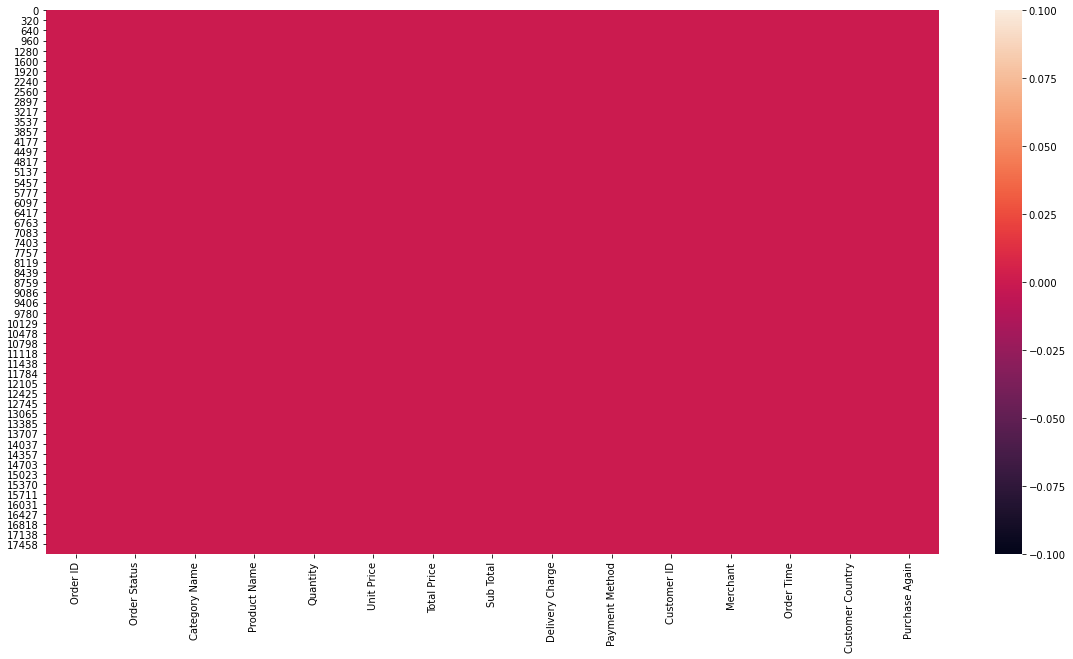

In [61]:

plt.figure(figsize=(20,10))
sns.heatmap(df_notna_custID.isna() , cbar =True )

In [62]:
'''
df_subtotal_isna =df_notna_custID[df_notna_custID['Sub Total'].isna() == True]
df_subtotal_isna.shape
order_id_unique=df_subtotal_isna['Order ID'].unique()
imputation des sub totale 
for order_id_value in order_id_unique :
    df_result = df_notna_custID.loc[df_notna_custID['Order ID'] == order_id_value]
    subtotal = df_result['Total Price'].sum()
    #print(subtotal)
    df_notna_custID.loc[df_notna_custID['Order ID'] == order_id_value , 'Sub Total'] = subtotal
'''

"\ndf_subtotal_isna =df_notna_custID[df_notna_custID['Sub Total'].isna() == True]\ndf_subtotal_isna.shape\norder_id_unique=df_subtotal_isna['Order ID'].unique()\nimputation des sub totale \nfor order_id_value in order_id_unique :\n    df_result = df_notna_custID.loc[df_notna_custID['Order ID'] == order_id_value]\n    subtotal = df_result['Total Price'].sum()\n    #print(subtotal)\n    df_notna_custID.loc[df_notna_custID['Order ID'] == order_id_value , 'Sub Total'] = subtotal\n"

In [63]:
df_notna_custID.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480.0,14400.0,43650.0,200200.0,CASH_PAY,8.39235e+06,6158523,2021-01-01 00:26:48,Algeria,1
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800.0,27000.0,43650.0,200200.0,CASH_PAY,8.39235e+06,6158523,2021-01-01 00:26:48,Algeria,1
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450.0,2250.0,43650.0,200200.0,CASH_PAY,8.39235e+06,6158523,2021-01-01 00:26:48,Algeria,1
3,8236624,COMPLETED,Paves,Pave chocolat,3,100.0,300.0,1460.0,700700.0,CARD_PAY,6.35954e+06,17654385,2021-01-01 00:27:29,Algeria,1
4,8236624,COMPLETED,Tartes,Tarte citron,3,100.0,300.0,1460.0,700700.0,CARD_PAY,6.35954e+06,17654385,2021-01-01 00:27:29,Algeria,1


In [64]:
df_notna_custID['Customer Country'].unique()

array(['Algeria', 'France', 'United Kingdom', 'Canada', 'United States',
       'Sweden'], dtype=object)

In [65]:
df_notna_custID['Payment Method'].unique()

array(['CASH_PAY', 'CARD_PAY', 'CASH', '0'], dtype=object)

In [66]:
df_notna_custID['Payment Method'].value_counts()

CARD_PAY    12124
CASH_PAY     4622
CASH          495
0              22
Name: Payment Method, dtype: int64

In [67]:
df_result = df_notna_custID[df_notna_custID['Payment Method'] == '0']
print(df_result.shape)
df_result.head()

(22, 15)


,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
14577,2536065820,COMPLETED,Recharge telephonique,Recharge ooredoo 2000DA,1,2200.0,2200.0,2200.0,1864065.25,0,1.75583e+06,17558898,2021-02-05 11:56:51,Algeria,1
14578,2334659808,COMPLETED,Recharge telephonique,Recharge ooredoo 2000DA,1,2200.0,2200.0,2200.0,1864065.25,0,1.75583e+06,17558898,2021-02-05 11:58:02,Algeria,1
14579,2485855625,COMPLETED,Legumes,Pomme de terre 250g,8,25.0,200.0,4620.0,1864065.25,0,1.75583e+06,8065701,2021-02-05 12:00:14,Algeria,1
14580,2485855625,COMPLETED,Legumes,Oignon 250g,4,20.0,80.0,4620.0,1864065.25,0,1.75583e+06,8065701,2021-02-05 12:00:14,Algeria,1
14581,2485855625,COMPLETED,Legumes,Tomate 250g,4,35.0,140.0,4620.0,1864065.25,0,1.75583e+06,8065701,2021-02-05 12:00:14,Algeria,1


In [68]:
df_result['Customer ID'].value_counts()

1755834.0    22
Name: Customer ID, dtype: int64

In [69]:
df_result2 = df_notna_custID[df_notna_custID['Customer ID'] == 1755834.0]
df_result2.shape

(30, 15)

Modifier '0' et 'CASH' en 'CASH_PAY' : 

In [70]:
df_notna_custID.loc[df_notna_custID['Payment Method'] == '0' , 'Payment Method'] = 'CASH_PAY'
df_notna_custID.loc[df_notna_custID['Payment Method'] == 'CASH' , 'Payment Method'] = 'CASH_PAY'

In [71]:
df_notna_custID['Payment Method'].value_counts()

CARD_PAY    12124
CASH_PAY     5139
Name: Payment Method, dtype: int64

In [72]:
liste = df_notna_custID['Category Name'].value_counts()
liste =liste[liste >5 ]
liste

OTHER             8274
Pates et riz       719
Legumes            563
Conserves          551
Nettoyage          507
                  ... 
Back To School       6
Energy Drinks        6
Sac a dos            6
Boissons             6
Soin bebe            6
Name: Category Name, Length: 91, dtype: int64

In [73]:
#liste = liste - ['Soin bebe', 'Boissons' , 'Cartouche' , 'Covid-19' , 'Salles' , 'Maquillage' , 'ARTICLES SCOLAIRES'] 

    


liste = ['OTHER', 'Pates et riz', 'Legumes', 'Conserves', 'Nettoyage',
       'Promotions', 'Farine et semoule', 'Fruits', 'Chocolat',
       'Petit dejeuner', 'Prod. Laitiers', 'Sauces et epices',
       'Recharge telephonique', 'Fromage', 'Biscuits', 'Lait', 'Conserve',
       'Boisson', 'Sucre et sel', 'Huile', 'Patisserie', 'The et cafe',
       'HygiÃ¨ne & beaute', 'Herbes', 'Boeuf', 'Ifri', 'Volaille',
       'Pates & Riz', 'Condiment', 'Cotex', 'Snacks', 'Tartes',
       'CrÃ¨merie et oeufs', 'HygiÃ¨ne', 'Mousses', 'Biscuit & Snack',
       'Fruits secs', 'Paves', 'Petit-dejeuner', 'Mille-Feuille', 'Mouton',
       'Eclaires', 'Promos', 'Garnitures', 'Stationeries', 'Coca-Cola',
       'Oeufs', 'Sauces & Condiments', 'Pain Special', 'Extra', 'Bebe',
       'Sucre & Sel', 'HygiÃ¨ne feminine', 'Specialite', 'Sucrerie',
       'Legumes secs', 'Cafe & the', 'Produits laitiers', 'Promotion',
       'Fromages', 'Recharge ADSL', 'Vienoisserie', 'Piments', 'Epices','Huiles', 'The', 'Traditionnel', 'Ooredoo', 'Olives', 'Confiserie', 'Jouets', 'HygiÃ¨ne Feminine', 'Scolarite', 'Nourriture', 
         'Gateaux secs',
        'Sac a dos', 'Back To School',
       'Samsung', 'Energy Drinks'] 

In [74]:
a = []
b = []
for category_value in liste :
    x =(df_notna_custID[df_notna_custID['Category Name'] == category_value]['Purchase Again'].value_counts())[0]
    y = (df_notna_custID[df_notna_custID['Category Name'] == category_value]['Purchase Again'].value_counts())[1]
    if (x/y) >= 1.8 :
        a.append(category_value)
    if (y/x) >= 1.8 :
        b.append(category_value)
categories_1 = a
categories_0 = b  

In [75]:
for category_name_value in df_notna_custID['Category Name'].unique() :
    if category_name_value in categories_0 :
        df_notna_custID.loc[df_notna_custID['Category Name'] == category_name_value , 'Category Name'] = 'rare_categorie'
    if category_name_value in categories_1 :
        df_notna_custID.loc[df_notna_custID['Category Name'] == category_name_value , 'Category Name'] = 'usual_categorie'
    else :
        df_notna_custID.loc[df_notna_custID['Category Name'] == category_name_value , 'Category Name'] = 'no_influential_categorie'
        

In [76]:
df_notna_custID['Category Name'].value_counts()

no_influential_categorie    15290
usual_categorie              1709
rare_categorie                264
Name: Category Name, dtype: int64

In [77]:
df_notna_custID['Category'] = df_notna_custID['Category Name']

In [78]:
df_notna_custID = pd.get_dummies(df_notna_custID, prefix=['Category' ,'Customer Country' , 'Payment Method'], columns=['Category','Customer Country' ,'Payment Method' ])

In [79]:
df_notna_custID.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Customer ID,...,Category_rare_categorie,Category_usual_categorie,Customer Country_Algeria,Customer Country_Canada,Customer Country_France,Customer Country_Sweden,Customer Country_United Kingdom,Customer Country_United States,Payment Method_CARD_PAY,Payment Method_CASH_PAY
0,8236617,DEFAULT,usual_categorie,03 fardeaux Ifri + 1 offert,30,480.0,14400.0,43650.0,200200.0,8.39235e+06,...,0,1,1,0,0,0,0,0,0,1
1,8236617,DEFAULT,usual_categorie,3 fardeaux coca achetes = 1 fardeau offert,15,1800.0,27000.0,43650.0,200200.0,8.39235e+06,...,0,1,1,0,0,0,0,0,0,1
2,8236617,DEFAULT,usual_categorie,Snickers mini cube 200g,5,450.0,2250.0,43650.0,200200.0,8.39235e+06,...,0,1,1,0,0,0,0,0,0,1
3,8236624,COMPLETED,no_influential_categorie,Pave chocolat,3,100.0,300.0,1460.0,700700.0,6.35954e+06,...,0,0,1,0,0,0,0,0,1,0
4,8236624,COMPLETED,no_influential_categorie,Tarte citron,3,100.0,300.0,1460.0,700700.0,6.35954e+06,...,0,0,1,0,0,0,0,0,1,0


In [80]:
df_notna_custID.shape

(17263, 24)

TEST SET TRANSFO :

In [81]:
df_test['Customer ID'] = df_test['Customer ID'].astype('object')
df_test['Merchant'] = df_test['Merchant'].astype('object')
df_test['Order ID'] = df_test['Order ID'].astype('object')
df_test['Order Time'] = pd.to_datetime(df_test['Order Time'])

In [82]:
patternDel = r"\d\d \w+ \d+"
df_test['Unit Price'] = df_test['Unit Price'].replace(patternDel,1,regex=True)  
df_test['Unit Price'] = df_test['Unit Price'].replace(['44,317.00'] , 1)

In [83]:
df_test['Unit Price'] = df_test['Unit Price'].astype('float32')
df_test['Total Price'] = df_test['Unit Price'] * df_test['Quantity']
order_id_unique=df_test['Order ID'].unique()
# imputation de 'Sub Total' : 
for order_id_value in order_id_unique :
    df_result1 = df_test.loc[df_test['Order ID'] == order_id_value]
    subtotal1 = df_result['Total Price'].sum()
    df_test.loc[df_test['Order ID'] == order_id_value , 'Sub Total'] = subtotal1
    
#df_test['Sub Total'] = df_test['Sub Total'].astype('float32')
df_test['Category Name'] = df_test['Category Name'].fillna('OTHER')
df_test['Customer Country'] = df_test['Customer Country'].fillna('Algeria')
# imputer les payment method avec la valeure dominante 
df_test['Payment Method'] = df_test['Payment Method'].fillna('CARD_PAY')
df_test.loc[df_test['Delivery Charge'] == '05 Sep 2021 00:00:0005 Sep 2021 00:00:00' , 'Delivery Charge'] = '200200'
df_test.loc[df_test['Delivery Charge'] == '0' , 'Delivery Charge'] = '200200'
df_test.loc[df_test['Delivery Charge'] == '11' , 'Delivery Charge'] = '200200'
df_test['Delivery Charge'] = df_test['Delivery Charge'].astype('float32')
df_test['Delivery Charge'] = df_test['Delivery Charge'].fillna(mean_delivery_charge)

df_test.loc[df_test['Payment Method'] == '0' , 'Payment Method'] = 'CASH_PAY'
df_test.loc[df_test['Payment Method'] == 'CASH' , 'Payment Method'] = 'CASH_PAY'


<AxesSubplot:>

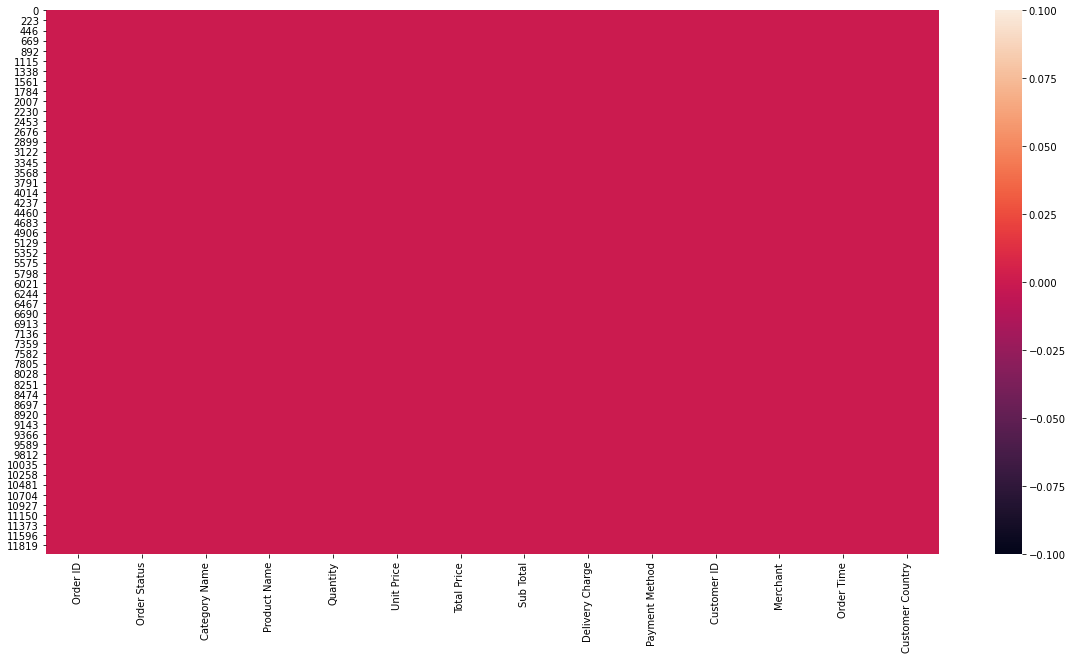

In [84]:
plt.figure(figsize=(20,10))
sns.heatmap(df_test.isna() , cbar =True )

In [85]:
for category_name_value in df_test['Category Name'].unique() :
    if category_name_value in categories_0 :
        df_test.loc[df_test['Category Name'] == category_name_value , 'Category Name'] = 'rare_categorie'
    if category_name_value in categories_1 :
        df_test.loc[df_test['Category Name'] == category_name_value , 'Category Name'] = 'usual_categorie'
    else :
        df_test.loc[df_test['Category Name'] == category_name_value , 'Category Name'] = 'no_influential_categorie'
        

In [86]:
df_test['Category'] = df_test['Category Name']

In [87]:
df_test = pd.get_dummies(df_test, prefix=['Category' ,'Customer Country' , 'Payment Method'], columns=['Category','Customer Country' ,'Payment Method' ])

In [88]:
df_test.shape

(12013, 25)

In [89]:
df_notna_custID.shape

(17263, 24)

In [90]:
df_notna_custID.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Product Name', 'Quantity',
       'Unit Price', 'Total Price', 'Sub Total', 'Delivery Charge',
       'Customer ID', 'Merchant', 'Order Time', 'Purchase Again',
       'Category_no_influential_categorie', 'Category_rare_categorie',
       'Category_usual_categorie', 'Customer Country_Algeria',
       'Customer Country_Canada', 'Customer Country_France',
       'Customer Country_Sweden', 'Customer Country_United Kingdom',
       'Customer Country_United States', 'Payment Method_CARD_PAY',
       'Payment Method_CASH_PAY'],
      dtype='object')

In [91]:
train = df_notna_custID.groupby('Customer ID').agg(
    nb_orders = pd.NamedAgg(column='Order ID', aggfunc='count'),
    nb_unique_orders = pd.NamedAgg(column='Order ID', aggfunc='nunique'),
    nb_unique_categories = pd.NamedAgg(column='Category Name', aggfunc='nunique'),
    #nb_no_influential_categorie = pd.NamedAgg(column='Category_no_influential_categorie', aggfunc='sum'),
    nb_rare_categorie = pd.NamedAgg(column='Category_rare_categorie', aggfunc='sum'),
    nb_usual_categorie = pd.NamedAgg(column='Category_usual_categorie', aggfunc='sum'),
    nb_unique_products = pd.NamedAgg(column='Product Name', aggfunc='nunique'),
    average_unit_price = pd.NamedAgg(column='Unit Price', aggfunc='mean'),
    total_spent = pd.NamedAgg(column='Total Price', aggfunc='sum'),
    total_quantity = pd.NamedAgg(column='Quantity', aggfunc='sum'),
    #total_delivery_charge = pd.NamedAgg(column='Delivery Charge', aggfunc='sum'),
    #nb_merchant = pd.NamedAgg(column='Merchant', aggfunc='count'),
    card_payement = pd.NamedAgg(column='Payment Method_CARD_PAY', aggfunc=lambda x:x.value_counts().index[0]),
    cash_payement = pd.NamedAgg(column='Payment Method_CASH_PAY', aggfunc=lambda x:x.value_counts().index[0]),
    Algeria = pd.NamedAgg(column='Customer Country_Algeria', aggfunc=lambda x:x.value_counts().index[0]),
    #Canada = pd.NamedAgg(column='Customer Country_Canada', aggfunc=lambda x:x.value_counts().index[0]),
    #France = pd.NamedAgg(column='Customer Country_France', aggfunc=lambda x:x.value_counts().index[0]),
    #Sweden = pd.NamedAgg(column='Customer Country_Sweden', aggfunc=lambda x:x.value_counts().index[0]),
    #UK = pd.NamedAgg(column='Customer Country_United Kingdom', aggfunc=lambda x:x.value_counts().index[0]),
    #USA = pd.NamedAgg(column='Customer Country_United States', aggfunc=lambda x:x.value_counts().index[0]),
    purchase_again = pd.NamedAgg(column='Purchase Again', aggfunc=lambda x:x.value_counts().index[0]), 

)

In [92]:
test = df_test.groupby('Customer ID').agg(
    nb_orders = pd.NamedAgg(column='Order ID', aggfunc='count'),
    nb_unique_orders = pd.NamedAgg(column='Order ID', aggfunc='nunique'),
    nb_unique_categories = pd.NamedAgg(column='Category Name', aggfunc='nunique'),
    nb_rare_categorie = pd.NamedAgg(column='Category_rare_categorie', aggfunc='sum'),
    nb_usual_categorie = pd.NamedAgg(column='Category_usual_categorie', aggfunc='sum'),
    nb_unique_products = pd.NamedAgg(column='Product Name', aggfunc='nunique'),
    average_unit_price = pd.NamedAgg(column='Unit Price', aggfunc='mean'),
    total_spent = pd.NamedAgg(column='Total Price', aggfunc='sum'),
    total_quantity = pd.NamedAgg(column='Quantity', aggfunc='sum'),
    #total_delivery_charge = pd.NamedAgg(column='Delivery Charge', aggfunc='sum'),
    #nb_merchant = pd.NamedAgg(column='Merchant', aggfunc='count'),
    card_payement = pd.NamedAgg(column='Payment Method_CARD_PAY', aggfunc=lambda x:x.value_counts().index[0]),
    cash_payement = pd.NamedAgg(column='Payment Method_CASH_PAY', aggfunc=lambda x:x.value_counts().index[0]),
    Algeria = pd.NamedAgg(column='Customer Country_Algeria', aggfunc=lambda x:x.value_counts().index[0]),
    #Canada = pd.NamedAgg(column='Customer Country_Canada', aggfunc=lambda x:x.value_counts().index[0]),
    #France = pd.NamedAgg(column='Customer Country_France', aggfunc=lambda x:x.value_counts().index[0]),
    #Sweden = pd.NamedAgg(column='Customer Country_Sweden', aggfunc=lambda x:x.value_counts().index[0]),
    #UK = pd.NamedAgg(column='Customer Country_United Kingdom', aggfunc=lambda x:x.value_counts().index[0]),
    #USA = pd.NamedAgg(column='Customer Country_United States', aggfunc=lambda x:x.value_counts().index[0]),

)

In [93]:
train.head()

,nb_orders,nb_unique_orders,nb_unique_categories,nb_rare_categorie,nb_usual_categorie,nb_unique_products,average_unit_price,total_spent,total_quantity,card_payement,cash_payement,Algeria,purchase_again
Customer ID,,,,,,,,,,,,,
1629574.0,5,4,1,0,0,4,293.600006,1588.0,6,0,1,1,1
1735264.0,1,1,1,0,0,1,3990.000000,3990.0,1,0,1,1,0
1755078.0,4,2,1,0,0,4,348.500000,2621.0,8,0,1,1,0
1755834.0,30,9,3,2,3,28,275.766663,21234.0,496,0,1,1,1
1756892.0,4,3,1,0,0,3,274.250000,1097.0,4,0,1,1,1


In [94]:
test.head()

,nb_orders,nb_unique_orders,nb_unique_categories,nb_rare_categorie,nb_usual_categorie,nb_unique_products,average_unit_price,total_spent,total_quantity,card_payement,cash_payement,Algeria
Customer ID,,,,,,,,,,,,
1786544.0,3,2,1,0,0,3,433.000000,31914.0,106,0,1,1
1790392.0,6,2,2,1,0,6,284.166656,2260.0,7,0,1,1
1792674.0,8,4,2,0,2,5,281.250000,8360.0,40,0,1,1
1806334.0,4,4,2,0,1,3,422.250000,3876.0,10,0,1,1
1814650.0,2,1,1,0,0,2,299.500000,1696.0,6,0,1,1


In [95]:
data2.head()

,Customer,Target
0,1786544.0,0
1,1790392.0,0
2,1792674.0,0
3,1806334.0,0
4,1814650.0,0


In [96]:
#nb_orders , average_unit_price , total_spent ,total_quantity , total_delivery_charge

In [97]:
train.shape

(999, 13)

In [98]:
test.shape

(767, 12)

In [99]:
def EVALUATION(model) :
    scores = cross_val_score(model , X, y, cv=3 , scoring= 'roc_auc' )  #,  return_train_score=True
    print('AUC  :' ,scores)
    print('average auc :' , scores.mean())
    N ,train_score , val_score =learning_curve(model, X , y , cv =4 , scoring = 'roc_auc' , train_sizes = np.linspace(0.1 , 1 , 10))
    plt.figure(figsize=(12,8))
    plt.plot(N , train_score.mean(axis =1) , label = 'train score')
    plt.plot(N , val_score.mean(axis =1) , label = 'validation score')
    plt.legend()
    #print(train_score.mean(axis =1).min())
    #print(val_score.mean(axis =1).max())

In [100]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier

In [101]:
X = train.drop('purchase_again',axis=1)
y = train['purchase_again']

random forest

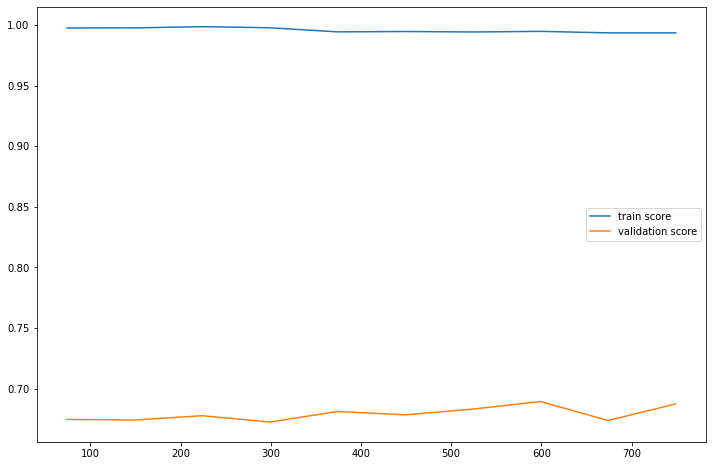

In [322]:
model = RandomForestClassifier(random_state=2)
EVALUATION(model)

AUC  : [0.70622318 0.67738197 0.73242489]
average auc : 0.7053433476394849


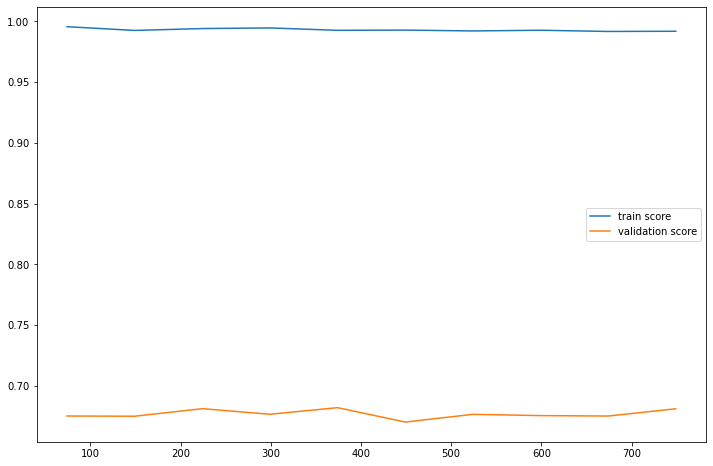

In [102]:
RF =make_pipeline(SelectKBest(f_classif) , RandomForestClassifier(random_state =2 ))
EVALUATION(RF)

In [324]:
params_grid = {'randomforestclassifier__n_estimators':[250,260,270],   #50, 100,
             'randomforestclassifier__max_features':[4 ,5 ,6,7],  #2, 3, 
             'randomforestclassifier__max_depth':[3,10,20],           #, 5, 7, 9
             'randomforestclassifier__min_samples_split':[2,3,5,6,7],   #, 5, 8
              #'selectkbest__k' : [9 ,10 ,11,12,13 , 14  , 17 , 18]
              }
grid_rf = GridSearchCV(RF , params_grid , cv=4 , scoring = 'roc_auc')  # n_iter 
grid_rf.fit(X , y)
rf_bestparams = grid_rf.best_params_
print(grid_rf.best_params_)
best_model = grid_rf.best_estimator_
EVALUATION(best_model)
#{'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 5,
#'randomforestclassifier__min_samples_split': 6, 'randomforestclassifier__n_estimators': 250}

KeyboardInterrupt: 

In [403]:
from sklearn.model_selection import LeaveOneOut , ShuffleSplit
cv = ShuffleSplit(4, random_state = 2)
params_grid = {'randomforestclassifier__n_estimators':[250,260,270],   #50, 100,
             'randomforestclassifier__max_features':[4 ,5 ,6,7],  #2, 3, 
             'randomforestclassifier__max_depth':[3,10,20],           #, 5, 7, 9
             'randomforestclassifier__min_samples_split':[2,3,5,6,7],   #, 5, 8
              #'selectkbest__k' : [9 ,10 ,11,12,13 , 14  , 17 , 18]
              }
grid_rf = GridSearchCV(RF , params_grid , cv=cv , scoring = 'roc_auc')  # n_iter 
grid_rf.fit(X , y)
rf_bestparams = grid_rf.best_params_
print(grid_rf.best_params_)


{'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 4, 'randomforestclassifier__min_samples_split': 7, 'randomforestclassifier__n_estimators': 270}


AUC  : [0.7672     0.71619048 0.71097143 0.77183908]
average auc : 0.7415502463054187


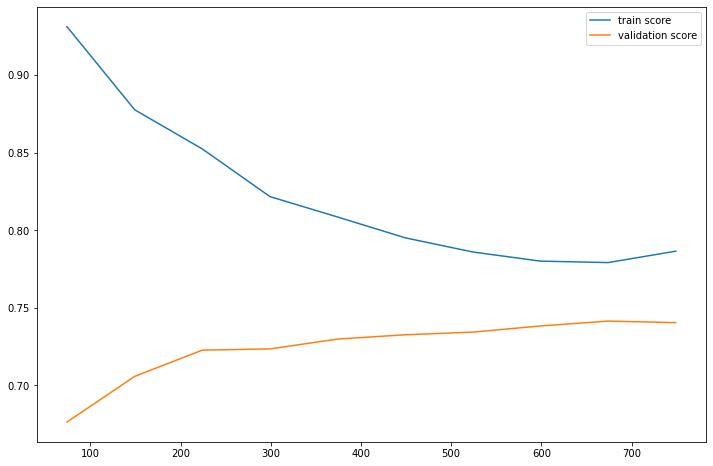

In [412]:
rf_opt = grid_rf.best_estimator_
EVALUATION(rf_opt)

In [103]:
rf_1_stratifiedfold =make_pipeline(SelectKBest(f_classif) , RandomForestClassifier(max_depth=3, max_features=5,
                                        min_samples_split=6, n_estimators=250    ,random_state =2 ))
rf_1 =make_pipeline(SelectKBest(f_classif) , RandomForestClassifier(max_depth=3, max_features=4,
                                        min_samples_split=7, n_estimators=270    ,random_state =2 ))

LIGHT GBM 

In [104]:
import lightgbm as lgbm

In [336]:
lgbm_clf = lgbm.LGBMClassifier(random_state = 2) #, metric = 'roc_auc', objective ='softmax',verbose=2
lgbm_clf.fit(X,y)

LGBMClassifier(random_state=2)

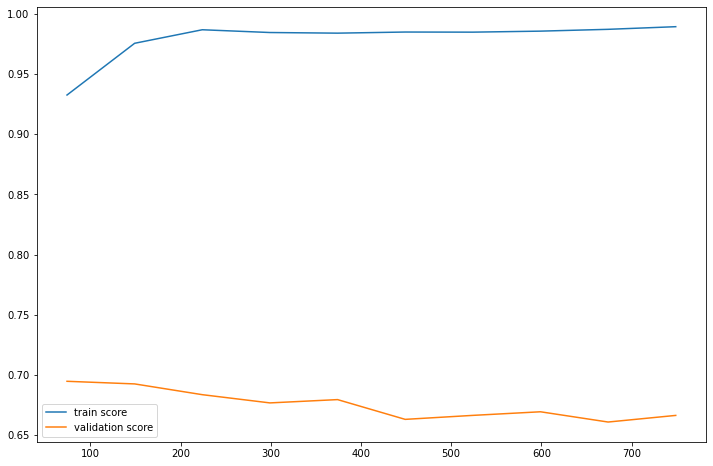

In [337]:
EVALUATION(lgbm_clf)

In [105]:
preprocessor = make_column_transformer((RobustScaler(), ['nb_orders' , 'average_unit_price' , 'total_spent' ,'total_quantity' ])  )
LGBM = make_pipeline(preprocessor ,PolynomialFeatures(3) ,SelectKBest(k=15), lgbm.LGBMClassifier(random_state = 2))  #,SelectKBest('all') 

In [409]:
from sklearn.model_selection import LeaveOneOut , ShuffleSplit
cv = ShuffleSplit(4, random_state = 2)
param_test = {'lgbmclassifier__learning_rate' : [ 0.1,0.2 , 0.3 , 0.4 , 0.5],
              'lgbmclassifier__n_estimators' : [590 , 600 ,620 ],
              'lgbmclassifier__num_leaves': [6,8,10,14], 
              'lgbmclassifier__min_child_samples': [290 ,300 ,310], 
              'lgbmclassifier__max_depth': [8],
              'lgbmclassifier__reg_alpha': [1e-1,0.2, 1],
              'lgbmclassifier__reg_lambda': [ 20,100]
             }

In [410]:
grid_lightgbm = RandomizedSearchCV( LGBM, param_test , cv=cv , scoring = 'roc_auc' , n_iter = 100) #, n_iter = 60
grid_lightgbm.fit(X , y)
print(grid_lightgbm.best_params_)


{'lgbmclassifier__reg_lambda': 20, 'lgbmclassifier__reg_alpha': 0.2, 'lgbmclassifier__num_leaves': 6, 'lgbmclassifier__n_estimators': 600, 'lgbmclassifier__min_child_samples': 310, 'lgbmclassifier__max_depth': 8, 'lgbmclassifier__learning_rate': 0.2}


AUC  : [0.68434286 0.66384762 0.57127619 0.67245211]
average auc : 0.64797969348659


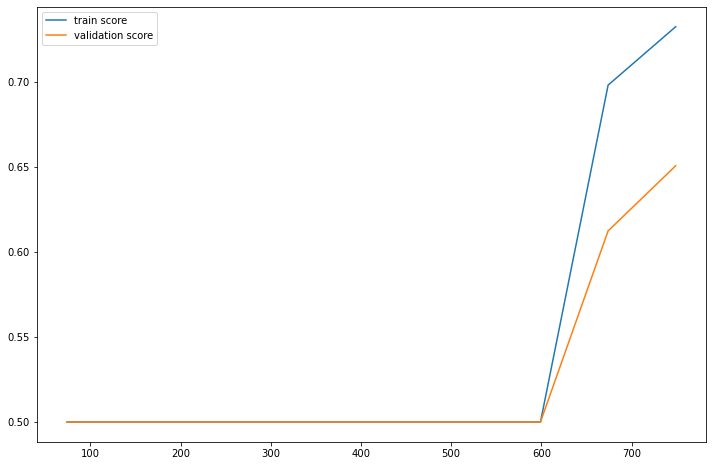

In [411]:
lightgbm_best = grid_lightgbm.best_estimator_
EVALUATION(lightgbm_best)

In [106]:
lgbm_1 = LGBMClassifier(reg_lambda= 100, reg_alpha= 0.1, num_leaves= 14, n_estimators= 600, min_child_samples= 300, max_depth= 8, learning_rate= 0.2 , random_state = 2)
lgbm_2 = LGBMClassifier(reg_lambda= 20, reg_alpha= 1, num_leaves= 6, n_estimators= 600, min_child_samples= 300, max_depth= 8, learning_rate= 0.2 , random_state = 2)
lgbm_3 = LGBMClassifier(reg_lambda= 20, reg_alpha= 1, num_leaves= 14, n_estimators= 590, min_child_samples= 300, max_depth= 8, learning_rate= 0.3 , random_state = 2)
lgbm_4 = LGBMClassifier(reg_lambda= 20, reg_alpha= 0.1, num_leaves= 8, n_estimators= 620, min_child_samples= 290, max_depth= 8, learning_rate= 0.1 , random_state = 2)

In [449]:
cv = ShuffleSplit(3 , random_state =2)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state =2)
logreg_cv=GridSearchCV(logreg,grid,cv=cv ,  scoring = 'roc_auc')
logreg_cv.fit( X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=2, test_size=None, train_size=None),
             estimator=LogisticRegression(random_state=2),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

AUC  : [0.68270476 0.70125714 0.64041905 0.71226054]
average auc : 0.6841603721948548


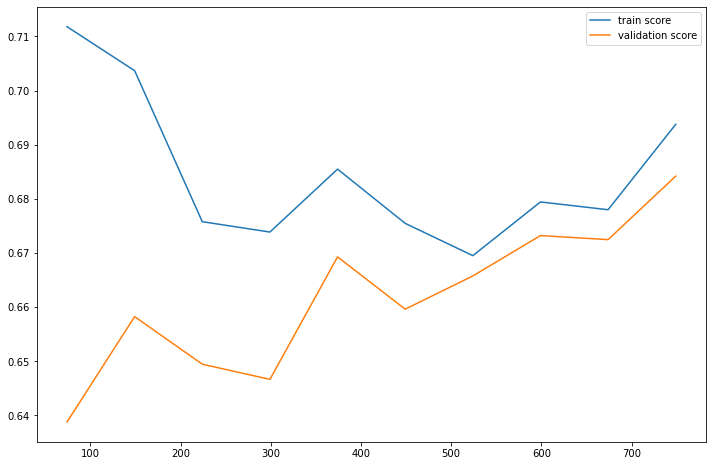

In [450]:
logreg_best = logreg_cv.best_estimator_
EVALUATION(logreg_best)

AUC  : [0.68285714 0.69729524 0.64034286 0.71563218]
average auc : 0.684031855500821


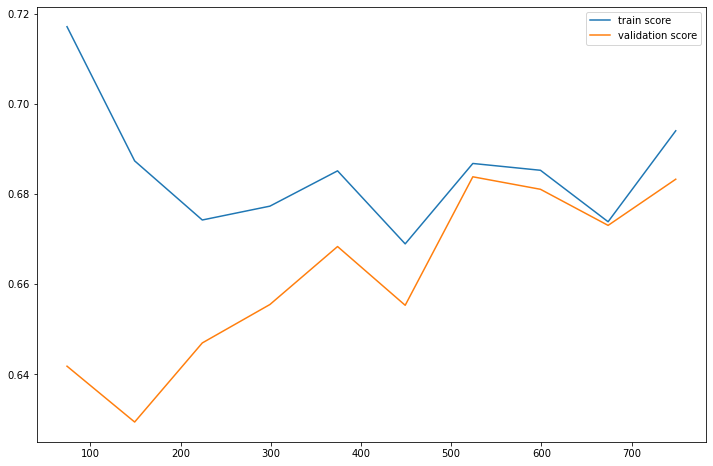

In [445]:
Logistic_reg = LogisticRegression(random_state =2)
Logistic_reg.fit(X,y)
EVALUATION(Logistic_reg)

In [107]:
from sklearn.ensemble import StackingClassifier 

AUC  : [0.62783262 0.64060086 0.57497854]
average auc : 0.6144706723891273


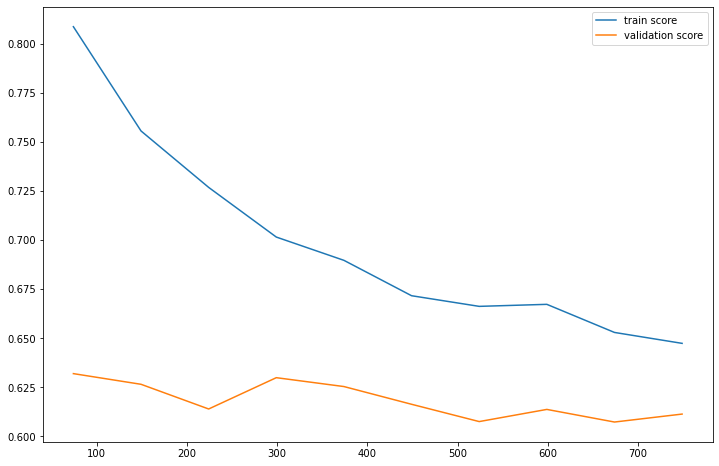

In [108]:
stacking_model = StackingClassifier([('rf' ,rf_1_stratifiedfold ),('lgbm' ,lgbm_1)  ], final_estimator=  LogisticRegression(random_state=2) , stack_method='predict' )
EVALUATION(stacking_model) #, stack_method='predict'

In [ ]:
#,('logreg' ,logreg_best)     7488 stack best score

In [ ]:
import catboost as ctb
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 24)
cat = CatBoostClassifier(
    iterations= 1500,
    learning_rate=0.05,
    random_state=42,
    task_type="GPU",  
    loss_function='MultiClass')
cat.fit(X_train,y_train)

AUC  : [0.5439619  0.5799619  0.55272381 0.61183908]
average auc : 0.5721216748768473


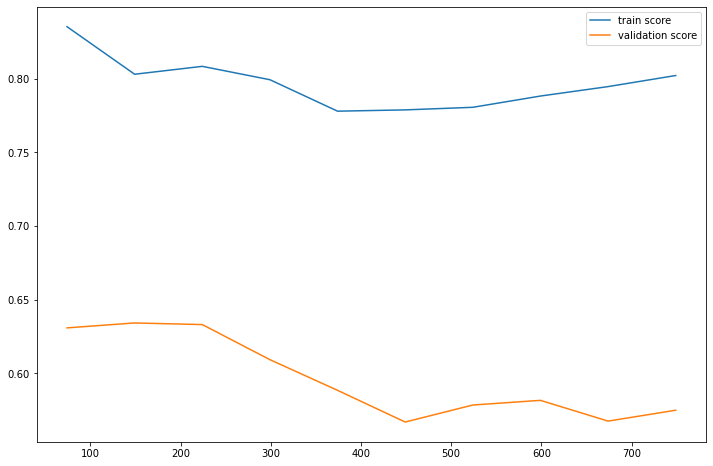

In [446]:
knn= KNeighborsClassifier()
knn.fit(X,y)
EVALUATION(knn)

In [429]:
preprocessor = make_column_transformer((RobustScaler(), ['nb_orders' , 'average_unit_price' , 'total_spent' ,'total_quantity' ])  )
XGB = make_pipeline(preprocessor,XGBClassifier(random_state = 2))  #,SelectKBest('all') 

In [430]:
params_grid = {'xgbclassifier__learning_rate' : [0.001 , 0.002 , 0.005 ,0.008 ,0.01] ,
               'xgbclassifier__max_depth': [7],
              'xgbclassifier__gamma': [0,2,3],
              'xgbclassifier__n_estimators': [20,40,60,80,100],
              'xgbclassifier__subsample' :[0.8],
               'xgbclassifier__colsample_bytree' : [0.5 ] #, 0.8 , 0.9 ,1
              }

grid_xgb = GridSearchCV(XGB , params_grid , cv=cv , scoring = 'roc_auc' ) #, n_iter = 60
grid_xgb.fit(X , y)
print(grid_xgb.best_params_)

#{'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.002,
#'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 40, 'xgbclassifier__subsample': 0.8}

[02:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[02:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

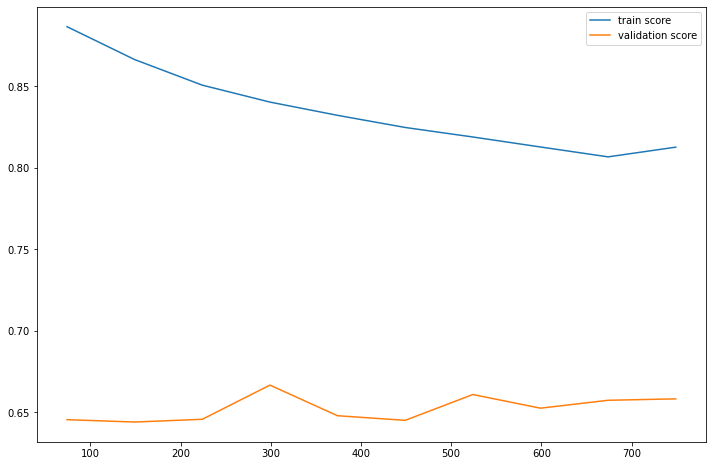

In [431]:
xgb_opt = grid_xgb.best_estimator_
EVALUATION(xgb_opt)

svm lagya test set

In [442]:
'''steps = [('scaler', preprocessor),('svc', SVC())]
pipeline = Pipeline(steps)
parameters = dict(svc__kernel = ['poly', 'rbf', 'sigmoid'],svc__gamma =  [0.0001, 0.001, 0.01, 0.1],svc__C = [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20])
cv = GridSearchCV(pipeline,param_grid = parameters,cv = cv,scoring = 'roc_auc',n_jobs = -1)

cv.fit(X, y)
svm_best = cv.best_estimator_
EVALUATION(cv.best_estimator_)'''

"steps = [('scaler', preprocessor),('svc', SVC())]\npipeline = Pipeline(steps)\nparameters = dict(svc__kernel = ['poly', 'rbf', 'sigmoid'],svc__gamma =  [0.0001, 0.001, 0.01, 0.1],svc__C = [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20])\ncv = GridSearchCV(pipeline,param_grid = parameters,cv = cv,scoring = 'roc_auc',n_jobs = -1)\n\ncv.fit(X, y)\nsvm_best = cv.best_estimator_\nEVALUATION(cv.best_estimator_)"

In [443]:
#svm_best = cv.best_estimator_

SUBMISSIONS  :

In [ ]:
submission = data2.copy()

In [333]:
submission["Target"] = y_pred
submission["Target"].value_counts()

In [ ]:
submission.to_csv("sub_test2.csv",index=False)

In [444]:

#RF{'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 5,
#'randomforestclassifier__min_samples_split': 6, 'randomforestclassifier__n_estimators': 250}

In [460]:
y_generated = stacking_model.predict(test)

AttributeError: 'StackingClassifier' object has no attribute 'final_estimator_'

In [ ]:
submission["Target"] = y_generated

In [ ]:
submission["Target"].value_counts()

In [454]:
submission.to_csv("stacking_1.csv",index=False)

In [ ]:
#dataframe = df_notna_custID.sort_values(by='Customer ID' , ascending=True)
#dataframe.head(20)

In [ ]:
'''dataframe = dataframe[['Customer ID',
 'Order ID',
 'Order Status',
 'Category Name',
 'Product Name',
 'Quantity',
 'Unit Price',
 'Total Price',
 'Sub Total',
 'Delivery Charge',
 'Payment Method',
 'Merchant',
 'Order Time',
 'Customer Country',
 'Purchase Again']]
dataframe.head()'''

Creation du nouveau dataset 

In [ ]:
#Costumer_df = pd.DataFrame(df_notna_custID['Customer ID'].unique() , columns = ['Customer ID'])
#Costumer_df.sort_values(by ='Customer ID' , ascending = True)


In [ ]:
'''for costumer_id_value in Costumer_df['Customer ID'].unique() :
    result_df = df_notna_custID.loc[df_notna_custID['Customer ID'] == costumer_id_value]
    number_of_orders = result_df['Order ID'].unique().shape[0]
    #print(costumer_id_value , '--->' ,number_of_orders)
    Costumer_df.loc[Costumer_df['Customer ID'] == costumer_id_value , 'Number of orders'] = number_of_orders
    '''

In [ ]:
#Costumer_df.head(6)

In [ ]:
# creer les variables 'Total Accepted' , 'Total Rejected' ..

In [ ]:
'''for costumer_id_value in Costumer_df['Customer ID'].unique() :
    result_df = df_notna_custID.loc[df_notna_custID['Customer ID'] == costumer_id_value]
    total_accepted = result_df['Order Status'].unique().shape[0]
    #print(costumer_id_value , '--->' ,number_of_orders)
    Costumer_df.loc[Costumer_df['Customer ID'] == costumer_id_value , 'Number of orders'] = number_of_orders'''

In [ ]:
'''result_df = df_notna_custID.loc[df_notna_custID['Customer ID'] == 7811702.0]
total_accepted = (result_df['Order Status'] == 'ACCEPTED')
total_accepted '''